In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [7]:
data = pd.read_csv("dataset_FLD.csv", header=None)
points_pos = np.where(data.iloc[:, -1].values == 1)
points_neg = np.where(data.iloc[:, -1].values == 0)

print(points_pos)

(array([  2,   3,   4,   7,   9,  11,  14,  18,  19,  21,  23,  25,  28,
        30,  32,  35,  36,  38,  39,  40,  41,  43,  44,  47,  48,  53,
        54,  56,  57,  60,  61,  62,  63,  64,  66,  70,  71,  72,  78,
        81,  82,  83,  89,  91,  92,  97,  98,  99, 101, 104, 105, 106,
       107, 108, 111, 113, 114, 120, 121, 126, 128, 129, 130, 131, 134,
       137, 139, 141, 143, 145, 147, 149, 150, 153, 154, 156, 157, 159,
       161, 164, 166, 169, 170, 171, 172, 173, 174, 178, 180, 181, 182,
       184, 189, 191, 195, 196, 197, 200, 201, 202, 207, 209, 212, 213,
       214, 215, 217, 221, 227, 228, 229, 230, 231, 232, 235, 240, 241,
       242, 249, 251, 252, 254, 256, 260, 264, 265, 266, 271, 275, 277,
       278, 279, 280, 283, 284, 285, 286, 288, 290, 293, 294, 295, 299,
       300, 302, 306, 309, 312, 314, 315, 316, 317, 322, 326, 329, 330,
       331, 336, 337, 338, 340, 344, 345, 346, 347, 350, 352, 354, 356,
       357, 359, 360, 367, 369, 372, 373, 374, 375, 376, 378, 3

In [6]:
l1 = len(data.iloc[points_pos])
# 
l2 = len(data.iloc[points_neg])
m1 = sum(data.iloc[points_pos].values[:, :-1]) / l1
#print(data.iloc[points_pos].values[:, :-1])
#print(m1)
m2 = sum(data.iloc[points_neg].values[:, :-1]) / l2
m1 = m1.reshape(len(m1), 1)  # transpose getting the dimension 3*1
m2 = m2.reshape(len(m2), 1)  # transpose

[[-4.03905804  0.33510238  0.54461753]
 [ 0.79352602 -0.23527668  0.55177053]
 [ 3.82027337 -0.27469099  0.45474338]
 ...
 [-4.06389961  0.8026109   1.02370781]
 [-0.81442967 -0.6939448   0.87677634]
 [-0.32512155 -0.75902371  1.29977242]]
[0.22310309 0.00255859 1.01027072]


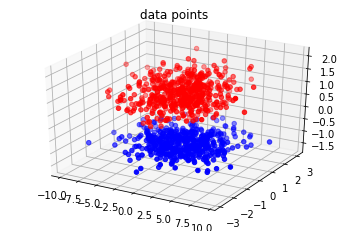

In [8]:
X = data.iloc[points_pos].values[:, 0]
Y = data.iloc[points_pos].values[:, 1]
Z = data.iloc[points_pos].values[:, 2]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, color='red')
X1 = data.iloc[points_neg].values[:, 0]
Y1 = data.iloc[points_neg].values[:, 1]
Z1 = data.iloc[points_neg].values[:, 2]
ax.scatter(X1, Y1, Z1, color='blue')
plt.title("data points")
plt.show()


In [9]:
dim = int(len(m1))
S_pos = np.zeros((dim, dim), dtype=float)  # initializing the matrix of dimension d*d with zeroes
S_neg = np.zeros((dim, dim), dtype=float)
for i in range(len(data)):
    if data.iloc[i, -1:].values == 1:
        S_pos += np.dot(np.transpose(data.iloc[i, :-1].values - m1), np.asarray(data.iloc[i, :-1].values - m1))
    else:
        S_neg += np.dot(np.transpose(data.iloc[i, :-1].values - m2), np.asarray(data.iloc[i, :-1].values - m2))
S_pos /= l1
S_neg /= l2
Sw = S_neg + S_pos
print("Sw : \n", Sw, "\n" )
w = np.dot(np.linalg.inv(Sw), m1 - m2)  # inverse of Sw d*d dimension and m1-m2 is d*1 hence w is d*1
print("w: \n",w,"\n")
w_unit = w / (np.square(w).sum())**0.5
print("unit vector along w : \n", w_unit, "\n")

Sw : 
 [[56.26292823  1.42921442  0.60122021]
 [ 1.42921442  8.21010684 -0.09746319]
 [ 0.60122021 -0.09746319  4.62838147]] 

w: 
 [[-0.00233742]
 [-0.00670093]
 [ 0.43560647]] 

unit vector along w : 
 [[-0.00536519]
 [-0.01538095]
 [ 0.99986731]] 



In [10]:
res_vec = np.zeros(len(data), dtype=float)
for j in range(len(data)):
    res_vec[j] = np.dot(np.transpose(w), data.iloc[j, :-1].values)  # wTX

#  finding the normal distributions mean and variance
points_p = res_vec[points_pos]
points_n = res_vec[points_neg]
mean_p = np.mean(points_p)
mean_n = np.mean(points_n)
std_d_p = np.std(points_p)
std_d_n = np.std(points_n)

In [11]:
a0 = 1 / 2 * ((1 / std_d_p ** 2) - (1 / std_d_n ** 2))
a1 = (mean_n / std_d_n ** 2) - (mean_p / std_d_p ** 2)
a2 = 1 / 2 * (mean_p ** 2 / std_d_p ** 2 - mean_n ** 2 / std_d_n ** 2) - np.log(std_d_n / std_d_p)
solution = np.roots([a0, a1, a2])


In [12]:
if max(mean_n, mean_p) >= solution[0] >= min(mean_n, mean_p):
    threshold_point = solution[0]
else:
    threshold_point = solution[1]
print("threshold value: ", threshold_point,"\n")


threshold value:  -0.1703454405971936 



discriminant line unit vector 
 [[-0.16786669]
 [-0.98569309]
 [-0.01516291]] 



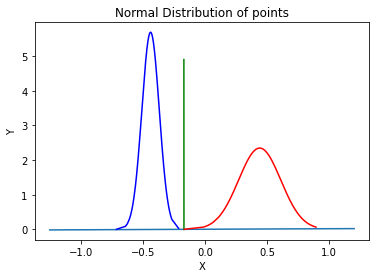

In [15]:
x = np.arange(-1.25, 1.25, 0.05)
y = (-w[0] - w[1] * x) / w[2]
plt.plot(x, y)
y1 = (-w[0] - w[1] * threshold_point) / w[2]

y2 = np.arange(0, 5, 0.1)
x2 = (w[1] * y + w[2] * threshold_point-w[1]*y1) / w[2]
plt.plot(x2, y2, color='green')

#  unit vector of discriminant  line
discriminant_line = np.zeros([len(w), 1])
discriminant_line[0] = w[2]*threshold_point-w[1]*y1
discriminant_line[1] = -w[2]
discriminant_line[2] = w[1]
dis_line_unit = discriminant_line / (np.square(discriminant_line).sum())**0.5
print("discriminant line unit vector \n",dis_line_unit,"\n")

#  plotting the normal distribution
points_p.sort()
points_n.sort()
plt.plot(points_p, stats.norm.pdf(points_p, mean_p, std_d_p), color='red')
plt.plot(points_n, stats.norm.pdf(points_n, mean_n, std_d_n), color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Normal Distribution of points")
plt.show()



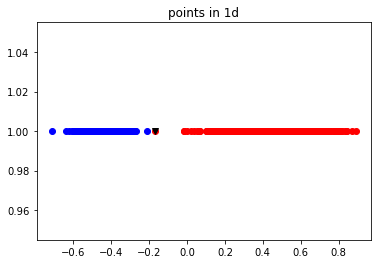

In [16]:
#  plotting the threshold point
x = threshold_point
y = 1
plt.plot(x, y, marker='v', color="black")

# plotting the points in 1D
plt.scatter(points_p, l1 * [1], color='red')
plt.scatter(points_n, l2 * [1], color='blue')
plt.title("points in 1d")
plt.show()

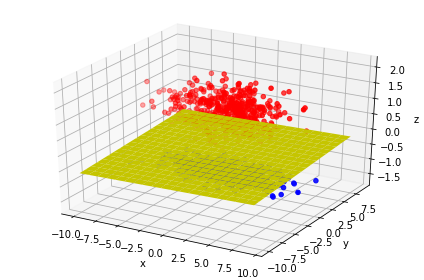

Sep_unit: 
 [[ 0.36415483]
 [-0.0049968 ]
 [-0.01432487]
 [ 0.93121484]] 



In [17]:
#  plotting the separator plane along with points
X = data.iloc[points_pos].values[:, 0]
Y = data.iloc[points_pos].values[:, 1]
Z = data.iloc[points_pos].values[:, 2]
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X, Y, Z, color='red')
X1 = data.iloc[points_neg].values[:, 0]
Y1 = data.iloc[points_neg].values[:, 1]
Z1 = data.iloc[points_neg].values[:, 2]
ax.scatter(X1, Y1, Z1, color='blue')
(x, y) = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))
z = (threshold_point - w[0] * x - w[1] * y) / w[2]  # wTx=t is the separator plane
ax.plot_surface(x, y, z, color='yellow')
ax.set(xlabel='x', ylabel='y', zlabel='z')
fig.tight_layout()
plt.show()

# unit vector in 3d
sep_plane = np.zeros([len(w)+1, 1])
sep_plane[0] = -threshold_point
sep_plane[1:4] = w
sep_plane_unit = sep_plane/np.linalg.norm(sep_plane)
print("Sep_unit: \n",sep_plane_unit,"\n")

In [18]:
# calculating accuracy
if mean_p < threshold_point:  # positive points are to the left and wtX<threshold for positive points
    c1 = 1
    c2 = 0
else:
    c1 = 0
    c2 = 1
prediction = np.zeros((len(data), 1))
given_class = data.iloc[:, -1].values
for i in range(len(data)):
    if res_vec[i] <= threshold_point:
        prediction[i] = c1
    else:
        prediction[i] = c2
count = 0
for j in range(len(data)):
    if prediction[j] == given_class[j]:
        count = count + 1;

accuracy = count / len(data)
print("The accuracy for the dataset: ", accuracy * 100, " % ")

The accuracy for the dataset:  100.0  % 
